In [1]:
%pylab inline
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
from sklearn.decomposition import TruncatedSVD
import scipy.io
import scipy
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# References
# https://scikit-learn.org/stable/modules/decomposition.html#decompositions

In [3]:
%%time
f="sample.mmtx"
t=scipy.io.mmread(f)
t # <class 'scipy.sparse.coo.coo_matrix'>

Wall time: 3min 25s


In [4]:
t_transpose = scipy.sparse.coo_matrix.transpose(t)

In [5]:
print(type(t))
print(t.shape)
print(type(t_transpose))
print(t_transpose.shape)

<class 'scipy.sparse.coo.coo_matrix'>
(4100, 240068)
<class 'scipy.sparse.coo.coo_matrix'>
(240068, 4100)


In [6]:
number_components = 20
svd_results = TruncatedSVD(n_components=number_components).fit_transform(t)

In [7]:
#print(svd_results.explained_variance_ratio_) 
#print(svd_results.explained_variance_ratio_.sum())

In [8]:
#print(svd_results.components_)
#print(svd_results.components_.shape)

In [9]:
df = pd.DataFrame(svd_results)
df.to_csv('truncatedsvd_20.tsv', sep='\t', header=False, index=False)

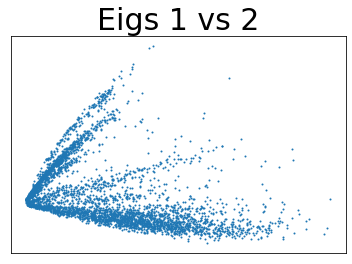

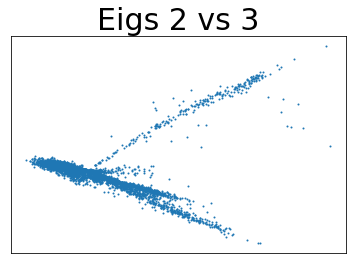

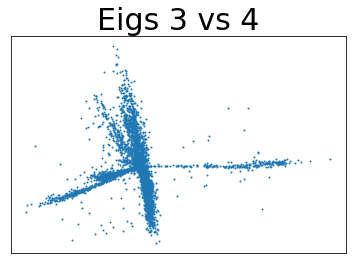

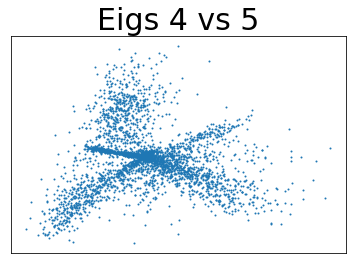

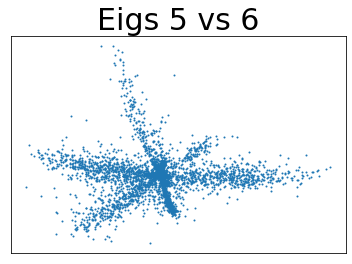

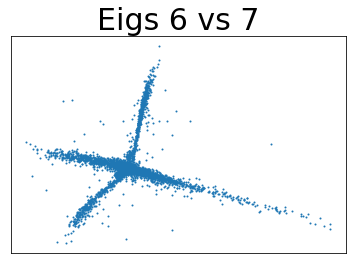

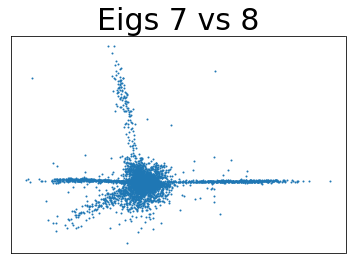

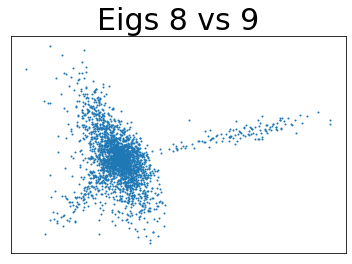

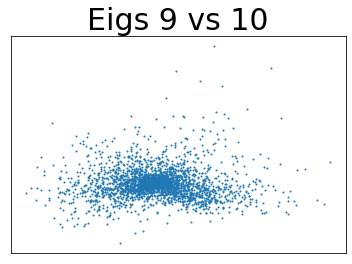

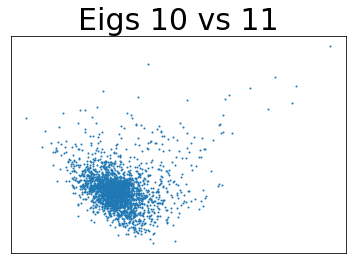

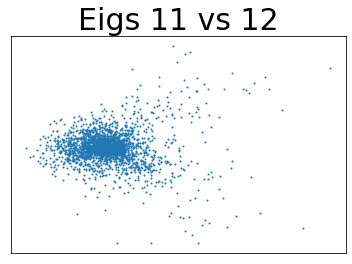

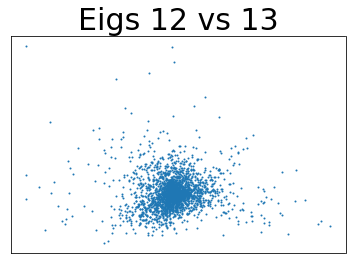

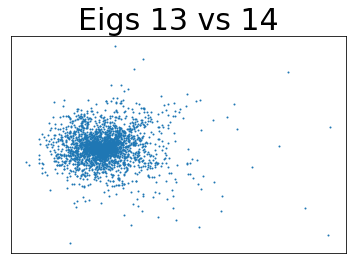

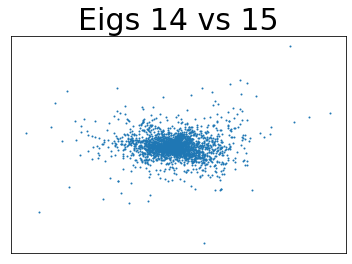

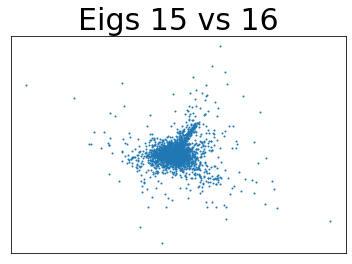

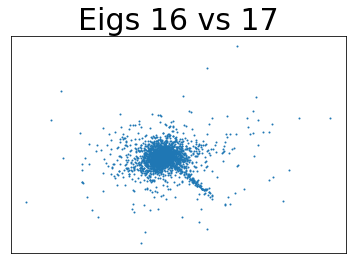

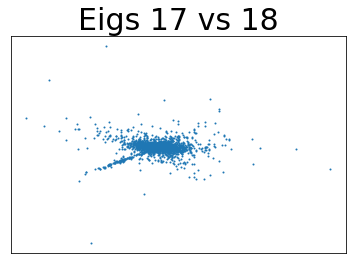

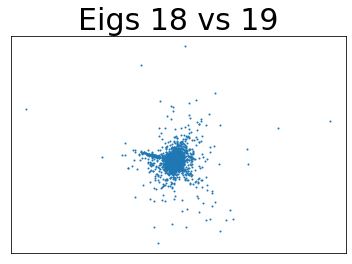

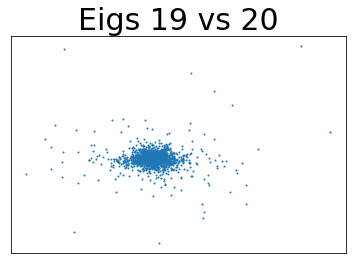

In [11]:
fig_num = -1

for i in range(0, number_components - 1):
    fig_num = fig_num + 1
    plt.figure(fig_num)
    plt.scatter(svd_results[:,fig_num], svd_results[:,fig_num + 1], s = 1)
    plt.title('Eigs %d vs %d'%(fig_num + 1, fig_num + 2),size=30)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)